In [139]:
# for analysis and data processing
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as pps
import datetime as dt
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# for modelling
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,precision_recall_curve,f1_score
from sklearn.metrics import confusion_matrix, precision_score,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import shap
import warnings
warnings.filterwarnings("ignore")

In [11]:
def read_data(path_to_csv_file):
    '''
    Reads csv files from specified paths

    Parameters:
            path to csv file locations
    Returns:
            dataframes of imported csv files
    '''
    # Read CSV files
    df = pd.read_csv(path_to_csv_file)
    
    return df

# call the function to import train data - update with relevant paths
train = read_data('/Users/mncedisimncwabe/Downloads/Train.csv')
test = read_data('/Users/mncedisimncwabe/Downloads/Test.csv')
economic__indicators = read_data('/Users/mncedisimncwabe/Downloads/economic_indicators.csv')

In [12]:
def df_snapshot(df):
    '''
    Returns top 5 rows of the dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return display(df.head())

print(f'train:')
df_snapshot(train)
print(f'test:')
df_snapshot(test)
print(f'economic:')
df_snapshot(economic__indicators)

train:


,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


test:


,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


economic:


,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.772980,18.042739,15.438992,11.679184,10.734267,16.494640,...,15.489616,17.149970,17.454635,12.371922,7.808765,7.143640,9.887290,9.971089,31.255895,38.106966
1,Cote d'Ivoire,"Inflation, consumer prices (annual %)",4.361529,3.077265,3.296807,1.457988,3.885830,2.467191,1.892006,6.308528,...,0.448682,1.251500,0.723178,0.685881,0.359409,-1.106863,2.425007,4.091952,5.276167,4.387117
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
3,Ghana,"Official exchange rate (LCU per US$, period av...",0.716305,0.792417,0.866764,0.899495,0.905209,0.915107,0.932619,1.052275,...,2.896575,3.714642,3.909817,4.350533,4.585325,5.217367,5.595708,5.805700,8.272400,11.020408
4,Cote d'Ivoire,"Official exchange rate (LCU per US$, period av...",732.397693,693.713226,579.897426,527.338032,527.258363,522.425625,478.633718,446.000041,...,493.757330,591.211698,592.605615,580.656750,555.446458,585.911013,575.586005,554.530675,623.759701,606.569750


In [4]:
def data_types(df):
    '''
    Returns datatype of fields in a dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return df.info()

print(f'train:')
data_types(train)
print(f'test:')
data_types(train)

train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_po

In [6]:
def convert_event_time_to_datetime(df,column):
    """
    Returns a dataframe with converted event_timestamp field from object to datetime
    
    Parameters:
        df (DataFrame): Pandas dataframe
        column (Object): Object field to datetime
    
    """
    df[column] = pd.to_datetime(df[column])
    
    return df

# convert in train
convert_event_time_to_datetime(train,'disbursement_date')
convert_event_time_to_datetime(train,'due_date')
# test
convert_event_time_to_datetime(test,'disbursement_date')
convert_event_time_to_datetime(test,'due_date')


,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.00,1989.00,2022-07-27,2022-08-03,7,Repeat Loan,575.70,0.300000,597.00
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.00,2153.00,2022-11-16,2022-11-23,7,Repeat Loan,0.00,0.000000,0.00
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.00,8304.00,2022-08-24,2022-08-31,7,Repeat Loan,207.00,0.025079,208.00
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.00,3379.00,2022-11-15,2022-11-22,7,Repeat Loan,1013.70,0.300000,1014.00
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.00,120.00,2022-11-10,2022-11-17,7,Repeat Loan,36.00,0.300000,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,ID_297596365331297183,297596,Ghana,365331,297183,Type_3,1730.41,1782.32,2023-02-09,2023-02-16,7,Repeat Loan,269.41,0.155689,279.77
18590,ID_259715231897267278,259715,Kenya,231897,267278,Type_1,1534.00,1534.00,2022-08-04,2022-08-11,7,Repeat Loan,460.20,0.300000,460.00
18591,ID_296701364008297183,296701,Ghana,364008,297183,Type_3,1372.21,1413.30,2022-06-23,2022-06-30,7,Repeat Loan,178.67,0.130208,178.67
18592,ID_268271242864267278,268271,Kenya,242864,267278,Type_1,5608.00,5781.00,2022-08-23,2022-08-30,7,Repeat Loan,0.00,0.000000,0.00


In [7]:
def null_checker(df):
    '''
    Returns the count of rows found in the data frame where there is a null present.

    Parameters:
        df (Dataframe): Pandas dataframe

    Returns:
        Prints the null count, null percentage, and row count per column.
    '''
    row_count = len(df)
    null_counts = df.isnull().sum().sort_values(ascending=False)
    null_percentages = (null_counts / row_count) * 100
    combined = pd.concat([null_counts, null_percentages], axis=1, keys=['Null Count', 'Null Percentage'])
    combined['Row Count'] = row_count
    print(combined)

# check nulls in train
print(f'train:')
null_checker(train)
print(f'test:')
null_checker(train)

train:
                             Null Count  Null Percentage  Row Count
ID                                    0              0.0      68654
customer_id                           0              0.0      68654
country_id                            0              0.0      68654
tbl_loan_id                           0              0.0      68654
lender_id                             0              0.0      68654
loan_type                             0              0.0      68654
Total_Amount                          0              0.0      68654
Total_Amount_to_Repay                 0              0.0      68654
disbursement_date                     0              0.0      68654
due_date                              0              0.0      68654
duration                              0              0.0      68654
New_versus_Repeat                     0              0.0      68654
Amount_Funded_By_Lender               0              0.0      68654
Lender_portion_Funded                 0  

In [8]:
train['customer_id'].nunique()

6540

/var/folders/__/7g992vcd0fs5t43310f6sl8m0000gn/T/ipykernel_70224/1520851697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='target', data=train, palette='pastel')


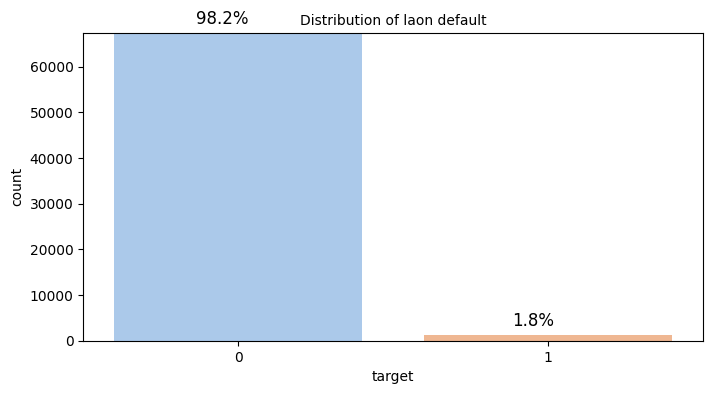

In [10]:
# plot distribution of has_uninstalled to check if there's class imbalance or not
plt.figure(figsize=(8, 4))
plt.title("Distribution of laon default", fontsize=10)
plot = sns.countplot(x='target', data=train, palette='pastel')
plt.ylim(0, train['target'].value_counts().max() + 1)  

def target(plot):
    total = len(train['target'])
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size=12, ha='center', va='center', xytext=(0, 10), textcoords='offset points')

target(plot)
plt.show()

In [16]:
# Filter data for Kenya
kenya_economic_data = economic__indicators[economic__indicators['Country'] == 'Kenya']

# Extract the most recent year's data (2022)
kenya_economic_2023 = kenya_economic_data[['Indicator', 'YR2023']].dropna()
kenya_economic_2023.rename(columns={'YR2023': 'Value'}, inplace=True)

# Transpose the economic indicators for merging
kenya_economic_transposed = kenya_economic_2022.set_index('Indicator').T

# Merge economic indicators with the training data
train_data_with_economic = train.copy()
for col in kenya_economic_transposed.columns:
    train_data_with_economic[col] = kenya_economic_transposed[col].values[0]

# Display the updated dataset with economic indicators
train_data_with_economic.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,Lender_portion_Funded,Lender_portion_to_be_repaid,target,"Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Interest rate spread (lending rate minus deposit rate, %)",Unemployment rate
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,0.014305,121.0,0,7.671396,139.846384,6.546517,9.16769,13.588502,4.420812,5.682
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,...,0.300000,7794.0,0,7.671396,139.846384,6.546517,9.16769,13.588502,4.420812,5.682
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,...,0.200000,1428.0,0,7.671396,139.846384,6.546517,9.16769,13.588502,4.420812,5.682
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,...,0.300000,2770.0,0,7.671396,139.846384,6.546517,9.16769,13.588502,4.420812,5.682
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,...,0.300000,1418.0,0,7.671396,139.846384,6.546517,9.16769,13.588502,4.420812,5.682


In [17]:
# Merge economic indicators with the test data
test_data_with_economic = test.copy()
for col in kenya_economic_transposed.columns:
    test_data_with_economic[col] = kenya_economic_transposed[col].values[0]

# Display the updated test dataset with economic indicators
test_data_with_economic.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,"Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Interest rate spread (lending rate minus deposit rate, %)",Unemployment rate
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,...,575.7,0.300000,597.0,7.671396,139.846384,6.546517,9.16769,13.588502,4.420812,5.682
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,...,0.0,0.000000,0.0,7.671396,139.846384,6.546517,9.16769,13.588502,4.420812,5.682
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,...,207.0,0.025079,208.0,7.671396,139.846384,6.546517,9.16769,13.588502,4.420812,5.682
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,...,1013.7,0.300000,1014.0,7.671396,139.846384,6.546517,9.16769,13.588502,4.420812,5.682
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,...,36.0,0.300000,36.0,7.671396,139.846384,6.546517,9.16769,13.588502,4.420812,5.682


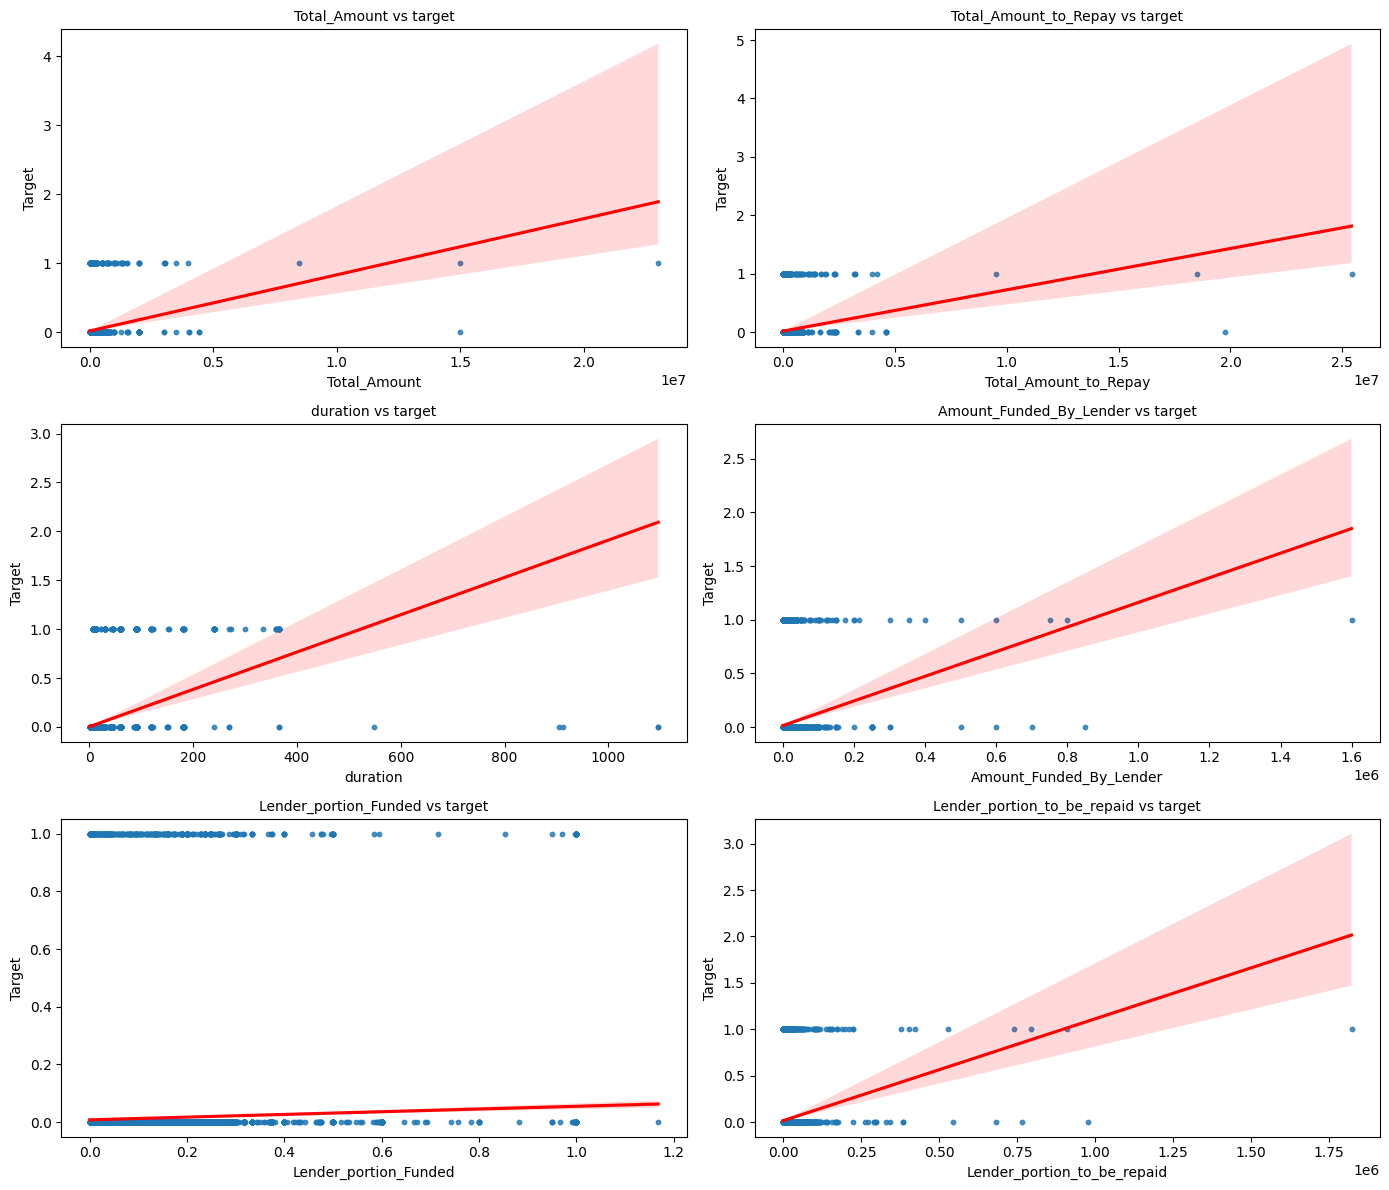

In [25]:
# Define the numerical columns
numerical_cols = ['Total_Amount','Total_Amount_to_Repay','duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded','Lender_portion_to_be_repaid','target']

# Calculate the number of plots (excluding 'Price' as it's the y-axis)
num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots + 1) // n_cols

# Create a subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

# Plot each numerical column against 'Price'
for i, col in enumerate(numerical_cols[:-1]):
    sns.regplot(data=train_data_with_economic, x=col, y='target', ax=axes[i], scatter_kws={"s": 10}, line_kws={"color": "red"})
    axes[i].set_title(f'{col} vs target', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Target')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

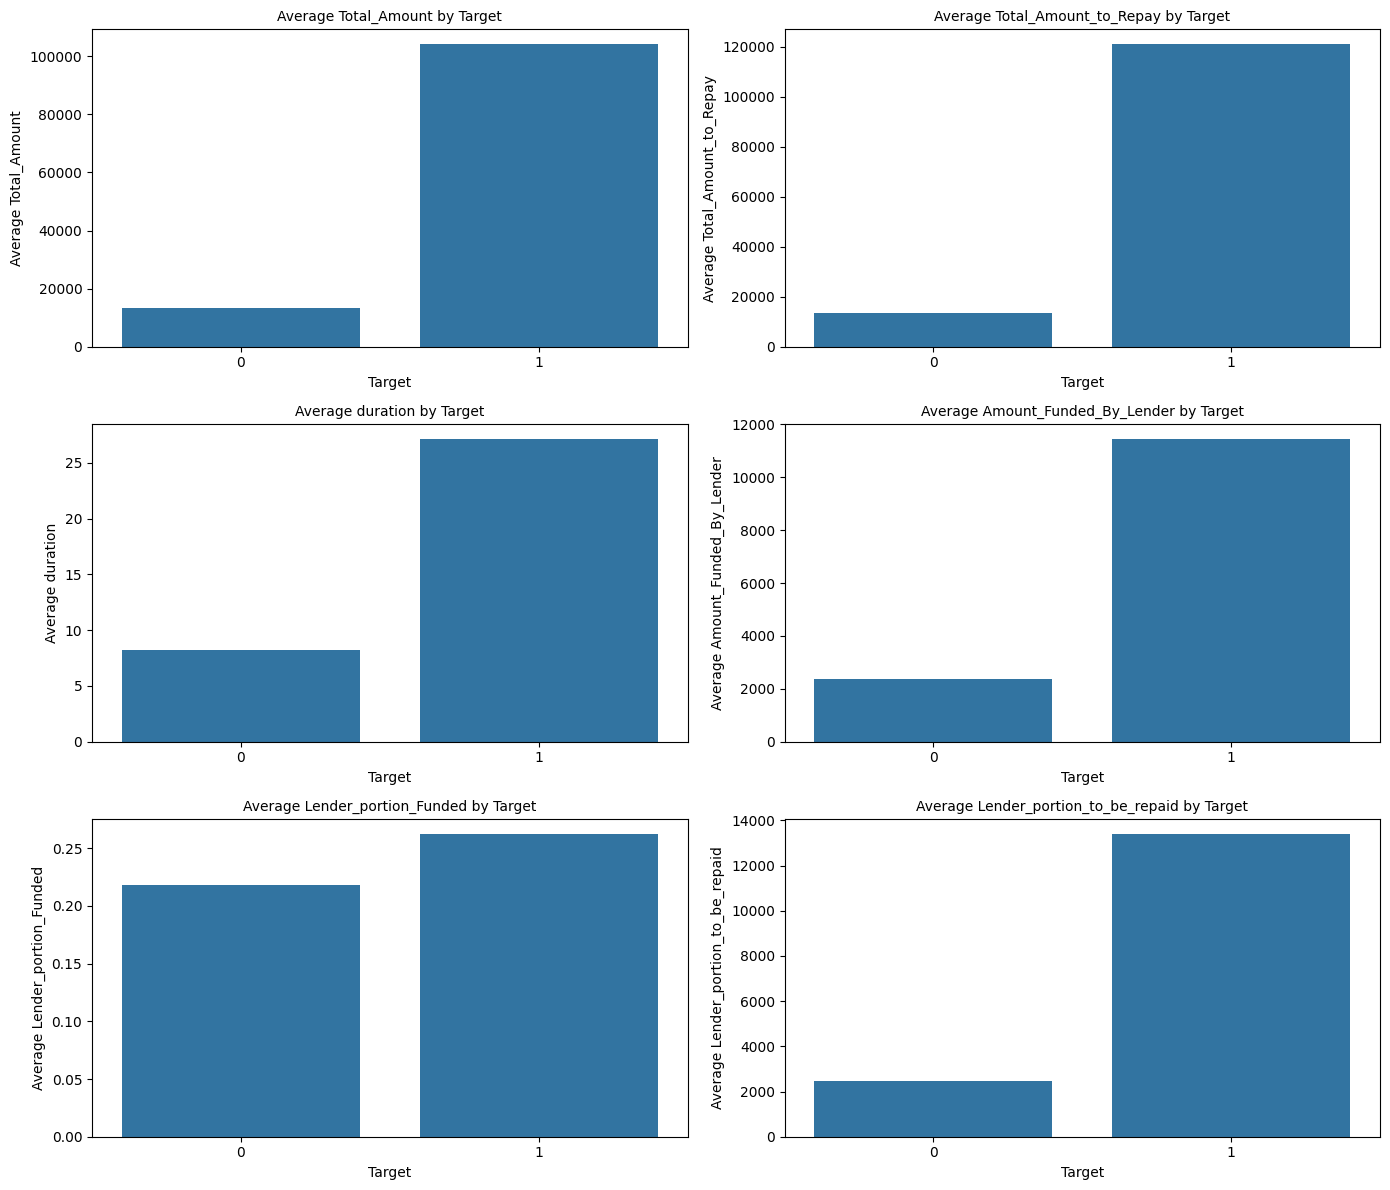

In [33]:
# Group numerical columns by target and calculate averages
numerical_cols = ['Total_Amount', 'Total_Amount_to_Repay', 'duration', 
                  'Amount_Funded_By_Lender', 'Lender_portion_Funded', 
                  'Lender_portion_to_be_repaid']

# Group by 'target' and calculate mean
grouped_means = train_data_with_economic.groupby('target')[numerical_cols].mean().reset_index()

# Plot the averages for each numerical column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.barplot(data=grouped_means, x='target', y=col, ax=axes[i], ci=None)
    axes[i].set_title(f'Average {col} by Target', fontsize=10)
    axes[i].set_xlabel('Target', fontsize=10)
    axes[i].set_ylabel(f'Average {col}', fontsize=10)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

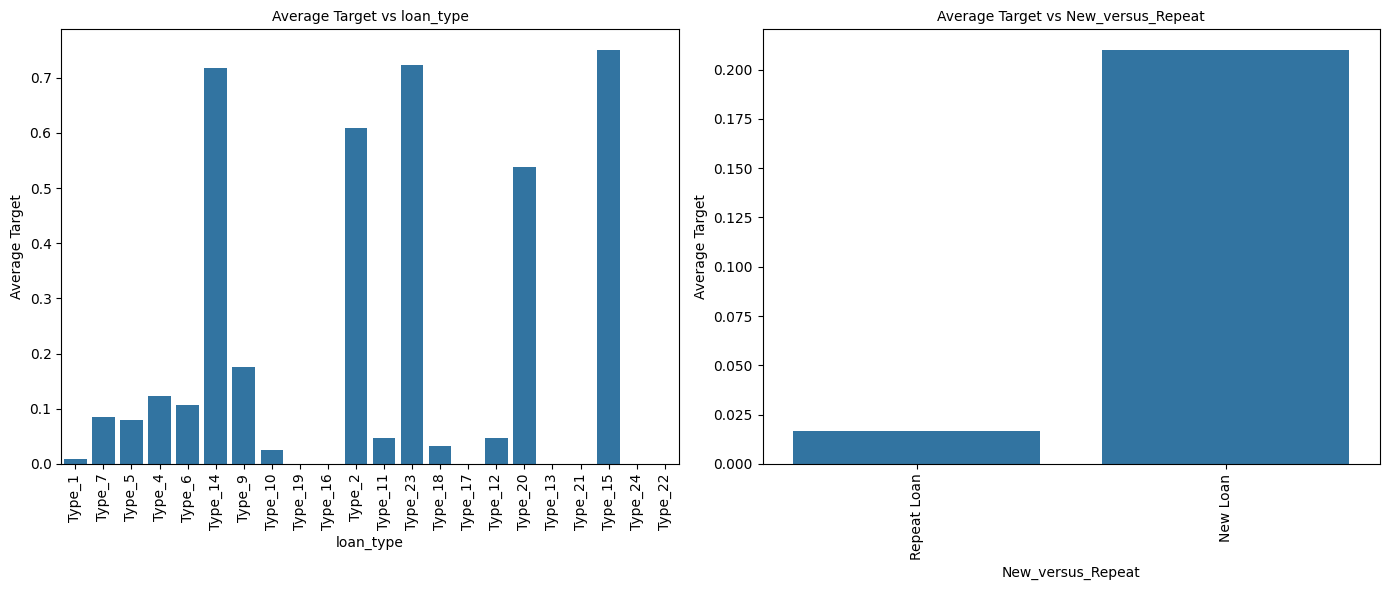

In [32]:
# Bivariate Analysis: categorical features vs average target
categorical_cols = ['loan_type', 'New_versus_Repeat']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) 
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.barplot(data=train_data_with_economic, x=col, y='target', ax=axes[i], ci=None)
    axes[i].set_title(f'Average Target vs {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=10)  
    axes[i].set_ylabel('Average Target', fontsize=10)
    axes[i].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()

In [36]:
train

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,ID_244559228408267278,244559,Kenya,228408,267278,Type_1,1460.0,1515.0,2022-07-30,2022-08-06,7,Repeat Loan,438.00,0.300000,455.0,0
68650,ID_260062217784267278,260062,Kenya,217784,267278,Type_1,5029.0,5116.0,2022-07-16,2022-07-23,7,Repeat Loan,1508.70,0.300000,1535.0,0
68651,ID_259137216701267278,259137,Kenya,216701,267278,Type_1,5289.0,5289.0,2022-07-15,2022-07-22,7,Repeat Loan,1586.70,0.300000,1587.0,0
68652,ID_266801303201267278,266801,Kenya,303201,267278,Type_1,3334.0,3334.0,2022-11-23,2022-11-30,7,Repeat Loan,741.09,0.222283,741.0,0


#### Insights 
- Total Amount to Repay and Total Amount vs. Target: A slight upward trend is visible, suggesting that larger loan amounts might have a slightly higher likelihood of default.  Loans that defaulted (Target = 1) have significantly higher average loan amounts and repayment obligations compared to loans that did not default (Target = 0). This suggests that larger financial obligations are associated with higher default risk.

- Duration vs. Target: A more noticeable upward trend indicates that loans with longer durations are associated with higher default rates. This might be due to increased uncertainty and financial stress over longer time periods. The average loan duration is much longer for defaulted loans than for non-defaulted loans, indicating that longer repayment periods might increase default risk.

- Amount Funded by Lender vs. Target: Loans where lenders contribute higher amounts tend to have a slightly higher likelihood of default. This could indicate that larger loans, requiring more funding, are riskier. Defaulted loans have a higher average amount funded by lenders, which aligns with the trend of higher loan sizes being riskier.
- Lender Portion Funded vs. Target: The lender's proportion of funding does not show a strong relationship with the target, suggesting that the proportion itself might not directly affect default rates.

- Loan Type vs Average Target: Different loan types exhibit distinct average target (default) rates.
Certain loan types (e.g., Type_14, Type_15, Type_2, Type23, Type20) have significantly higher default rates compared to others.
Loan type is a critical feature for predicting defaults, as it captures inherent risk characteristics.

- New vs Repeat Loans:New loans have a much higher average default rate compared to repeat loans.
This indicates that repeat customers (likely returning borrowers) demonstrate better repayment behavior.

In [44]:
def calculate_predictive_power(df, target):
    """
    Calculates the predictive power score (PPS) for variables in a dataframe against a target variable.
    
    """
    # Target variable should be of type string for PPS calculation
    df[target] = df[target].astype(str)
    predictors_df = pps.predictors(df, target)
    sorted_predictors = predictors_df.sort_values(by="ppscore", ascending=False)
    
    return sorted_predictors

predictors_df = calculate_predictive_power(train_data_with_economic, "target")
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,loan_type,target,0.135357,classification,True,weighted F1,0.973976,0.977499,DecisionTreeClassifier()
1,Lender_portion_Funded,target,0.020797,classification,True,weighted F1,0.973976,0.974518,DecisionTreeClassifier()
2,duration,target,0.014636,classification,True,weighted F1,0.973976,0.974357,DecisionTreeClassifier()
3,disbursement_date,target,0.007203,classification,True,weighted F1,0.973976,0.974164,DecisionTreeClassifier()
4,due_date,target,0.003137,classification,True,weighted F1,0.973976,0.974058,DecisionTreeClassifier()
10,Real interest rate (%),target,0.000001,classification,True,weighted F1,0.973976,0.973976,DecisionTreeClassifier()
14,Unemployment rate,target,0.000001,classification,True,weighted F1,0.973976,0.973976,DecisionTreeClassifier()
13,Interest rate spread (lending rate minus depos...,target,0.000001,classification,True,weighted F1,0.973976,0.973976,DecisionTreeClassifier()
12,Lending interest rate (%),target,0.000001,classification,True,weighted F1,0.973976,0.973976,DecisionTreeClassifier()
11,Deposit interest rate (%),target,0.000001,classification,True,weighted F1,0.973976,0.973976,DecisionTreeClassifier()



- loan_type has the highest PPS (0.135357) relative to the target variable (target), indicating that it has the strongest predictive power among the features. This aligns with previous analyses showing that different loan types have varying default rates.
- Lender_portion_Funded and duration have notable PPS values (0.020797 and 0.014636, respectively). These features contribute some predictive power but are not as strong as loan_type.

In [75]:
def encode_loan_features_label(dataframe):
    """
    Encodes 'loan_type' and 'New_versus_Repeat' using Label Encoding.
    
    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the features to be encoded.
        
    Returns:
        pd.DataFrame: The updated DataFrame with encoded columns.
    """
    # Initialize label encoders
    loan_type_encoder = LabelEncoder()
    new_repeat_encoder = LabelEncoder()
    
    # Encode 'loan_type'
    if 'loan_type' in dataframe.columns:
        dataframe['loan_type_encoded'] = loan_type_encoder.fit_transform(dataframe['loan_type'])
        dataframe.drop(columns=['loan_type'], inplace=True)
    
    # Encode 'New_versus_Repeat'
    if 'New_versus_Repeat' in dataframe.columns:
        dataframe['New_versus_Repeat_encoded'] = new_repeat_encoder.fit_transform(dataframe['New_versus_Repeat'])
        dataframe.drop(columns=['New_versus_Repeat'], inplace=True)
    
    return dataframe

# Apply label encoding
new_train = encode_loan_features_label(train_data_with_economic)
new_test = encode_loan_features_label(test_data_with_economic)


In [77]:
def set_features_and_target(df):
    '''
    Returns two data frames with features and target variables.
            Parameters:
                    df (str): Pandas dataframe
    '''
    X = df.drop(['ID','customer_id','country_id','lender_id','tbl_loan_id','due_date','disbursement_date','target'], axis=1)
    y = df['target']
    
    return X,y
                 
X,y = set_features_and_target(new_train)
print(X.shape, y.shape)

(68654, 15) (68654,)


In [78]:
def train_test_split_df(X,y):
    '''
    Creates train and test split.

    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_df(X,y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(48057, 15) (48057,)
(20597, 15) (20597,)


In [93]:
def model_application(X_train,y_train,optimiser):
    # Building model
    '''
    Model application. If optimiser is true , a grid search is applied to optimise the model. 
    If optimiser is false base model is used
            Parameters:
                    X_train : Pandas dataframe of feature set training variables
                    y_train : Pandas dataframe of predictor variable for training set.
                    optimiser : Boolean to indicate optimisation required. 
            Returns:
                    Random Forest model.
    '''
    if optimiser == True:
                # Build the model with K-fold validation and GridSearch to find the best parameters

                # Defining all the parameters
                params = {
                'max_features': [1, 3, 10],
                'min_samples_split': [2, 3, 10],
                'min_samples_leaf': [1, 3, 10],
                'criterion': ["entropy", "gini"]
                }

                cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=15)

                # Building model
                rf = RandomForestClassifier()

                # Parameter estimating using GridSearch
                grid = GridSearchCV(rf, param_grid=params, scoring='f1', n_jobs =-1, cv=cv, verbose=1)
                
                # Fitting the model
                grid.fit(X_train, y_train)

                dtc_grid_val_score = grid.best_score_
                print('Best Score:', dtc_grid_val_score)
                print('Best Params:', grid.best_params_)
                print('Best Estimator:', grid.best_estimator_)

                rf_clf = grid.best_estimator_
    else:
                rf_clf = RandomForestClassifier(n_estimators=150,
                                                max_depth=16,
                                                criterion='gini',
                                                class_weight='balanced',
                                                min_samples_split=10,
                                                max_leaf_nodes=20,
                                                max_features=0.5,
                                                bootstrap=True)
                rf_clf.fit(X_train, y_train)

    return rf_clf

optimiser = True
rf_clf = model_application(X_train,y_train,optimiser)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Score: 0.7017995062308574
Best Params: {'criterion': 'entropy', 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best Estimator: RandomForestClassifier(criterion='entropy', max_features=10,
                       min_samples_split=3)


In [94]:
def model_predict(X_test):
    '''
    Create y_pred , model prediction based on test set features.
            Parameters:
                    X_test (str): Pandas dataframe
            Returns:
                    y_pred
    '''
    y_pred = rf_clf.predict(X_test)
    
    return y_pred

y_pred = model_predict(X_test)
print('Training Accuracy Score(%):',rf_clf.score(X_train,y_train)*100)
print('Test Accuracy Score(%):',rf_clf.score(X_test,y_test)*100)

Training Accuracy Score(%): 99.98959568845329
Test Accuracy Score(%): 99.16978200708841


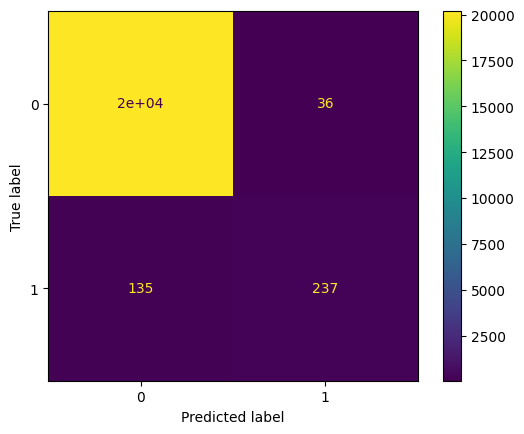

array([[20189,    36],
       [  135,   237]])

In [95]:
def generate_confusion_matrix(y_test, y_pred):
    '''
    Generates confusion matrix.
            Parameters:
                    y_test (array): numpy array of actual values
                    y_pred (array): numpy array of predicted values
            Returns:
                    Y_pred
    '''
    
    cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
    disp.plot()
    plt.grid(False) 
    plt.show()
    
    return cm

generate_confusion_matrix(y_test, y_pred)

In [96]:
def generate_perfomance_metrics(y_test,y_pred):
    '''
    Generates perfomance metrics precision, recall, f1 score, accuracy
            Parameters:
                    y_test (array): numpy array of actual values
                    y_pred (array): numpy array of predicted values
            Returns:
                    y_pred
    '''
    rf_model_score = accuracy_score(y_test, y_pred)
    print('Model Accuracy:', rf_model_score)
    return print('Classification Report:\n', classification_report(y_test, y_pred))

generate_perfomance_metrics(y_test,y_pred)

Model Accuracy: 0.9916978200708841
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     20225
           1       0.87      0.64      0.73       372

    accuracy                           0.99     20597
   macro avg       0.93      0.82      0.87     20597
weighted avg       0.99      0.99      0.99     20597



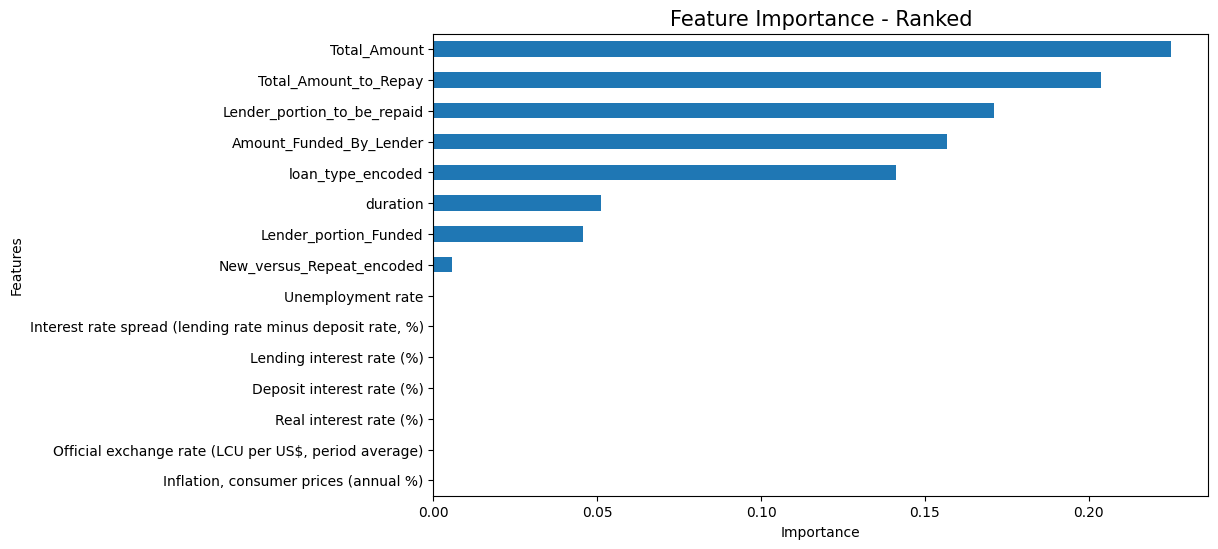

In [108]:
def plot_feature_importance(model, feature_names, n=40):
    
    '''
    Produces a plot displaying features that are most important predictors of the target feature.
            Parameters:
                    random forest model
                    feature names
    '''
    
    plt.figure(figsize=(10, 6))

    feat_importances = pd.Series(model.feature_importances_, index=feature_names)
    feat_importances.nsmallest(n).plot(kind='barh')
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title("Feature Importance - Ranked", fontsize=15)
    plt.show()

plot_feature_importance(rf_clf, X_train.columns)

In [ ]:
# Drop unnecessary columns for prediction
columns_to_exclude = ['ID','customer_id','country_id','lender_id','tbl_loan_id','due_date','disbursement_date']
test_features = new_test.drop(columns=columns_to_exclude, errors='ignore')

# Perform predictions
new_test['Target'] = rf_clf.predict(test_features)

# Create the final output with 'ID' and 'Target'
final_output = new_test[['ID', 'Target']]

final_output.head()
# Save or display the result
#final_output.to_csv('final_predictions.csv', index=False)


In [110]:
def feature_engineering(dataframe):
    # Interaction terms
    if 'Total_Amount' in dataframe.columns and 'duration' in dataframe.columns:
        dataframe['Total_Amount_per_duration'] = dataframe['Total_Amount'] / (dataframe['duration'] + 1)
    
    if 'Lender_portion_to_be_repaid' in dataframe.columns and 'Total_Amount' in dataframe.columns:
        dataframe['Lender_portion_repaid_ratio'] = dataframe['Lender_portion_to_be_repaid'] / dataframe['Total_Amount']
    
    # Log transformations for skewed features
    for col in ['Total_Amount', 'Total_Amount_to_Repay', 'Lender_portion_to_be_repaid']:
        if col in dataframe.columns:
            dataframe[f'log_{col}'] = np.log1p(dataframe[col])
    
    return dataframe

# Apply feature engineering to training and test datasets
X_train_engineered = feature_engineering(X_train.copy())
X_test_engineered = feature_engineering(X_test.copy())

# Drop low-importance features based on previous analysis
low_importance_features = [
    'Unemployment rate',
    'Interest rate spread (lending rate minus deposit rate, %)',
    'Lending interest rate (%)',
    'Deposit interest rate (%)',
    'Real interest rate (%)',
    'Official exchange rate (LCU per US$, period average)',
    'Inflation, consumer prices (annual %)'
]

X_train_engineered.drop(columns=low_importance_features, inplace=True, errors='ignore')
X_test_engineered.drop(columns=low_importance_features, inplace=True, errors='ignore')

# Retrain the model with the engineered features
rf_clf_engineered = model_application(X_train_engineered, y_train, optimiser=True)

# Evaluate the model on the test set
y_pred_engineered = rf_clf_engineered.predict(X_test_engineered)

print("Classification Report (Engineered Features):")
print(classification_report(y_test, y_pred_engineered))
print("F1 Score:", f1_score(y_test, y_pred_engineered))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Score: 0.8013291740199309
Best Params: {'criterion': 'entropy', 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best Estimator: RandomForestClassifier(criterion='entropy', max_features=10,
                       min_samples_split=3)
Classification Report (Engineered Features):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20225
           1       0.87      0.71      0.78       372

    accuracy                           0.99     20597
   macro avg       0.93      0.85      0.89     20597
weighted avg       0.99      0.99      0.99     20597

F1 Score: 0.7810650887573964


In [116]:
# Apply feature engineering and log transformations to the test dataset
new_test_engineered = feature_engineering(new_test.copy())

# Drop low-importance features from the test dataset
low_importance_features = [
    'Unemployment rate',
    'Interest rate spread (lending rate minus deposit rate, %)',
    'Lending interest rate (%)',
    'Deposit interest rate (%)',
    'Real interest rate (%)',
    'Official exchange rate (LCU per US$, period average)',
    'Inflation, consumer prices (annual %)'
]

new_test_engineered.drop(columns=low_importance_features, inplace=True, errors='ignore')

# Ensure feature alignment between training and test datasets
new_test_engineered = new_test_engineered[X_train_engineered.columns]

# Perform predictions using the trained engineered model
new_test_engineered['Target'] = rf_clf_engineered.predict(new_test_engineered)

# Prepare the final output with 'ID' and 'Target'
final_output_engineered = new_test[['ID']].copy()
final_output_engineered['Target'] = new_test_engineered['Target']


In [133]:
# Predict probabilities
y_proba = rf_clf_engineered.predict_proba(X_test_engineered)[:, 1]

# Tune threshold
thresholds = [i * 0.1 for i in range(1, 10)]
f1_scores = []
for t in thresholds:
    y_pred_threshold = (y_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))
 
# Find best threshold
best_threshold = thresholds[f1_scores.index(max(f1_scores))]
print("Best Threshold:", best_threshold)

# Apply the threshold to predictions
y_pred_final = (y_proba >= best_threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_final))
print("F1 Score:", f1_score(y_test, y_pred_final))

Best Threshold: 0.4
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20225
           1       0.83      0.75      0.79       372

    accuracy                           0.99     20597
   macro avg       0.91      0.87      0.89     20597
weighted avg       0.99      0.99      0.99     20597

F1 Score: 0.7909604519774012


In [131]:
new_test_proba = rf_clf_engineered.predict_proba(new_test_engineered)[:, 1]
new_test_predictions = (new_test_proba >= 0.4).astype(int)
final_output = new_test[['ID']].copy()
final_output['Target'] = new_test_predictions

In [132]:
final_output.to_csv('final_output2.csv', index=False)